In [1]:
import warnings

import numpy as np
import timecorr as tc
import seaborn as sns
import os
from matplotlib import pyplot as plt
from matplotlib import gridspec
from scipy.stats import wishart
import hypertools as hyp
from scipy.spatial.distance import cdist
from scipy.io import loadmat

%matplotlib inline

LEGEND_SIZE = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
if not os.path.isdir('figs'):
    os.mkdir('figs')
figdir = 'figs'

In [3]:
def plot_ribbon(ts, xs, color='k', ribbon_alpha=0.2, ax=None, xlab=None, ylab=None):
    mean = np.mean(xs, axis=0)
    ci = 1.96 * np.divide(np.std(xs, axis=0), np.sqrt(xs.shape[0]))
    
    if ax == None:
        ax = plt.gca()
    plt.sca(ax)
    
    h1 = ax.fill_between(ts, mean - ci, mean + ci, color=color, alpha=ribbon_alpha)
    h2 = ax.plot(ts, mean, color=color)
    
    if not (xlab == None):
        plt.xlabel(xlab)
    
    if not (ylab == None):
        plt.ylabel(ylab)
    
    return h1, h2

In [20]:
width = 10
delta = {'name': '$\delta$', 'weights': tc.eye_weights, 'params': tc.eye_params}
gaussian = {'name': 'Gaussian', 'weights': tc.gaussian_weights, 'params': {'var': width}}
laplace = {'name': 'Laplace', 'weights': tc.laplace_weights, 'params': {'scale': width}}
mexican_hat = {'name': 'Mexican hat', 'weights': tc.mexican_hat_weights, 'params': {'sigma': width}}
kernels = [delta, gaussian, laplace, mexican_hat]

In [5]:
pieman_data = loadmat('../data/pieman_ica100.mat')
pieman_conds = ['intact', 'paragraph', 'word', 'rest']

data = []
conds = []
for c in pieman_conds:
    next_data = list(map(lambda i: pieman_data[c][:, i][0], np.arange(pieman_data[c].shape[1])))
    data.extend(next_data)
    conds.extend([c]*len(next_data))
del pieman_data

data = np.array(data)
conds = np.array(conds)

In [21]:
results = tc.timepoint_decoder(data[conds == 'intact'], weights_params=laplace['params'], rfun='eigenvector_centrality')

In [22]:
results

{'accuracy': 0.0016666666666666668,
 'error': 0.30380156075808257,
 'rank': 0.11366666666666672}

In [6]:
N = 10
T = 100
x = np.cumsum(np.random.randn(T, N), axis=0)

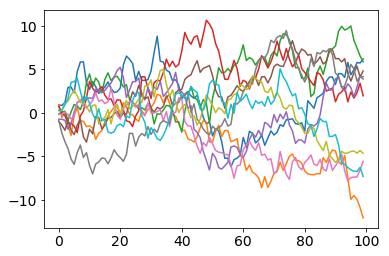

In [7]:
plt.plot(x);

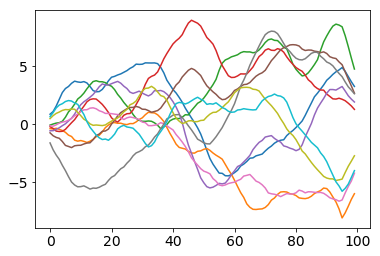

In [8]:
plt.plot(tc.smooth(x, kernel_fun=tc.uniform_weights));

In [7]:
isfc_intact = tc.timecorr(data[conds == 'intact'].tolist(), combine=tc.helpers.corrmean_combine)

In [9]:
?np.argmax

Signature: np.argmax(a, axis=None, out=None)
Docstring:
Returns the indices of the maximum values along an axis.

Parameters
----------
a : array_like
    Input array.
axis : int, optional
    By default, the index is into the flattened array, otherwise
    along the specified axis.
out : array, optional
    If provided, the result will be inserted into this array. It should
    be of the appropriate shape and dtype.

Returns
-------
index_array : ndarray of ints
    Array of indices into the array. It has the same shape as `a.shape`
    with the dimension along `axis` removed.

See Also
--------
ndarray.argmax, argmin
amax : The maximum value along a given axis.
unravel_index : Convert a flat index into an index tuple.

Notes
-----
In case of multiple occurrences of the maximum values, the indices
corresponding to the first occurrence are returned.

Examples
--------
>>> a = np.arange(6).reshape(2,3)
>>> a
array([[0, 1, 2],
       [3, 4, 5]])
>>> np.argmax(a)
5
>>> np.argmax(a, axis=0

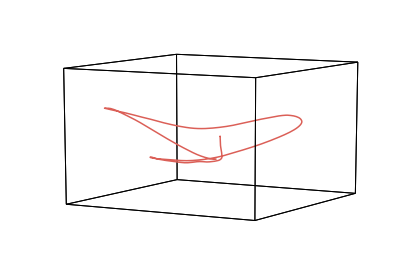

In [8]:
hyp.plot(isfc_intact)

decoding analysis with cross-validation (repeat 100x):
- split each condition into two groups
- compute isfc within each group
- use one group to decode the other

compute decoding accuracy by:
- condition
- level (1...5?)
- kernel?